In [1]:
pip install alpha_vantage

  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage


In [8]:
pip install pyramid

     |████████████████████████████████| 327kB 4.9MB/s 
     |████████████████████████████████| 174kB 40.4MB/s 
     |████████████████████████████████| 122kB 45.9MB/s 


In [9]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 4.6MB/s 


DEPENDENCIES

In [0]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from fbprophet import Prophet
import sys
import types
import pandas as pd
from botocore.client import Config
def __iter__(self): return 0
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from matplotlib import pyplot as plt



In [173]:
ts = TimeSeries(key='XCLGRT2QLL8P4MK1',output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='TSLA', outputsize='full')
print(data)



             1. open   2. high  ...  7. dividend amount  8. split coefficient
date                            ...                                          
2010-06-29   19.0000   25.0000  ...                 0.0                   1.0
2010-06-30   25.7900   30.4192  ...                 0.0                   1.0
2010-07-01   25.0000   25.9200  ...                 0.0                   1.0
2010-07-02   23.0000   23.1000  ...                 0.0                   1.0
2010-07-06   20.0000   20.0000  ...                 0.0                   1.0
2010-07-07   16.4000   16.6300  ...                 0.0                   1.0
2010-07-08   16.1400   17.5200  ...                 0.0                   1.0
2010-07-09   17.5800   17.9000  ...                 0.0                   1.0
2010-07-12   17.9500   18.0700  ...                 0.0                   1.0
2010-07-13   17.3938   18.6400  ...                 0.0                   1.0
2010-07-14   17.9400   20.1500  ...                 0.0         

FACEBOOK PROPHET MODEL

In [174]:
dataset = data.reset_index(level=0, inplace=True)
dataset_clean = data.rename(columns = {'date' : 'ds','4. close' : 'y'})
dataset_clean.head()

,ds,1. open,2. high,3. low,y,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
0,2010-06-29,19.00,25.0000,17.54,23.89,23.89,18766300.0,0.0,1.0
1,2010-06-30,25.79,30.4192,23.30,23.83,23.83,17187100.0,0.0,1.0
2,2010-07-01,25.00,25.9200,20.27,21.96,21.96,8218800.0,0.0,1.0
3,2010-07-02,23.00,23.1000,18.71,19.20,19.20,5139800.0,0.0,1.0
4,2010-07-06,20.00,20.0000,15.83,16.11,16.11,6866900.0,0.0,1.0


In [175]:
model = Prophet()
model.add_country_holidays(country_name='US')
model.fit(dataset_clean)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [176]:
future = model.make_future_dataframe(periods = 255)
forecast = model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),Christmas Day (Observed)_lower,Christmas Day (Observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (Observed),Independence Day (Observed)_lower,Independence Day (Observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,"Martin Luther King, Jr. Day","Martin Luther King, Jr. Day_lower","Martin Luther King, Jr. Day_upper",Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (Observed),New Year's Day (Observed)_lower,New Year's Day (Observed)_upper,Thanksgiving,Thanksgiving_lower,Thanksgiving_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (Observed),Veterans Day (Observed)_lower,Veterans Day (Observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,19.570879,-1.348184,52.758717,19.570879,19.570879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.179026,7.179026,7.179026,0.0,0.0,0.0,-0.714796,-0.714796,-0.714796,7.893822,7.893822,7.893822,0.0,0.0,0.0,26.749905
1,2010-06-30,19.595969,-2.071882,51.423485,19.595969,19.595969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.770073,6.770073,6.770073,0.0,0.0,0.0,-0.645291,-0.645291,-0.645291,7.415364,7.415364,7.415364,0.0,0.0,0.0,26.366042
2,2010-07-01,19.621059,0.542734,52.506042,19.621059,19.621059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.179564,6.179564,6.179564,0.0,0.0,0.0,-0.725258,-0.725258,-0.725258,6.904822,6.904822,6.904822,0.0,0.0,0.0,25.800623
3,2010-07-02,19.646149,-2.188163,52.916000,19.646149,19.646149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.126249,5.126249,5.126249,0.0,0.0,0.0,-1.247705,-1.247705,-1.247705,6.373954,6.373954,6.373954,0.0,0.0,0.0,24.772398
4,2010-07-06,19.746508,-2.033081,49.703654,19.746508,19.746508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.567894,3.567894,3.567894,0.0,0.0,0.0,-0.714796,-0.714796,-0.714796,4.282690,4.282690,4.282690,0.0,0.0,0.0,23.314402
5,2010-07-07,19.771598,-3.583137,48.584573,19.771598,19.771598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.178717,3.178717,3.178717,0.0,0.0,0.0,-0.645291,-0.645291,-0.645291,3.824008,3.824008,3.824008,0.0,0.0,0.0,22.950314
6,2010-07-08,19.796688,-5.941214,49.659770,19.796688,19.796688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.685987,2.685987,2.685987,0.0,0.0,0.0,-0.725258,-0.725258,-0.725258,3.411245,3.411245,3.411245,0.0,0.0,0.0,22.482675
7,2010-07-09,19.821777,-5.834001,48.891869,19.821777,19.821777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.805282,1.805282,1.805282,0.0,0.0,0.0,-1.247705,-1.247705,-1.247705,3.0

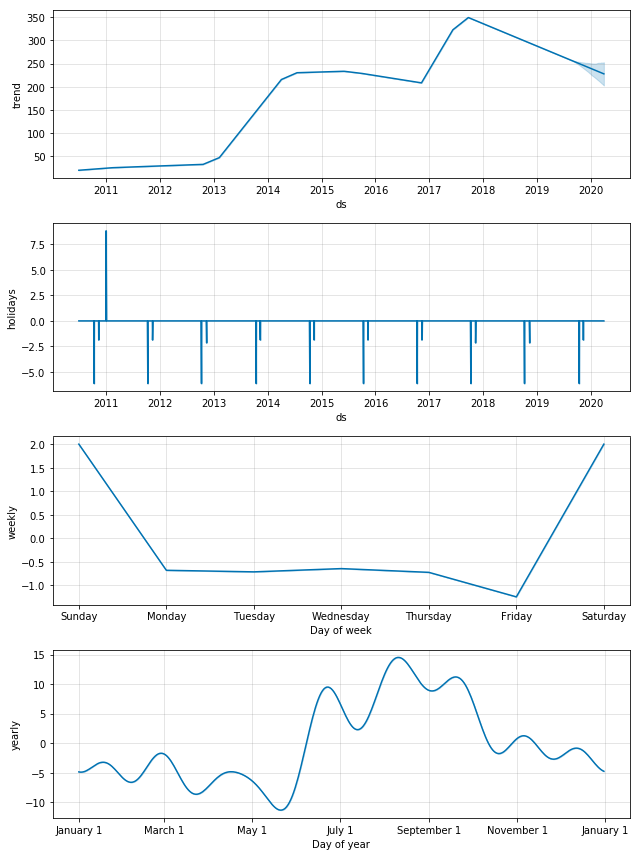

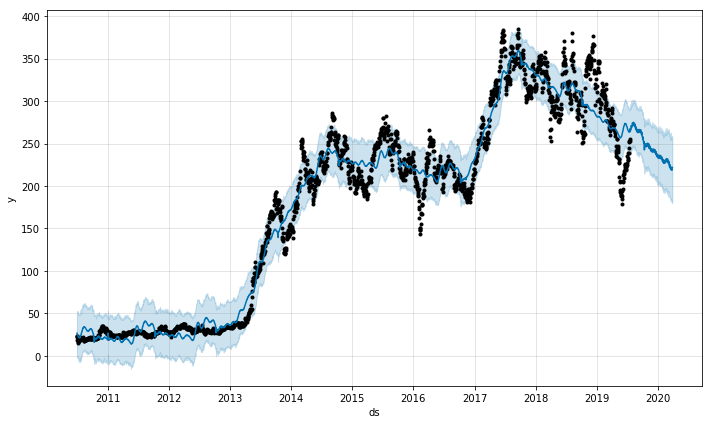

In [177]:
model.plot_components(forecast)

dataset_clean.tail(15)

future.tail()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

plot = model.plot(forecast)

ARIMA MODEL


In [184]:
ts = TimeSeries(key='XCLGRT2QLL8P4MK1',output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol='TSLA', outputsize='full')
print(data)

             1. open   2. high  ...  7. dividend amount  8. split coefficient
date                            ...                                          
2010-06-29   19.0000   25.0000  ...                 0.0                   1.0
2010-06-30   25.7900   30.4192  ...                 0.0                   1.0
2010-07-01   25.0000   25.9200  ...                 0.0                   1.0
2010-07-02   23.0000   23.1000  ...                 0.0                   1.0
2010-07-06   20.0000   20.0000  ...                 0.0                   1.0
2010-07-07   16.4000   16.6300  ...                 0.0                   1.0
2010-07-08   16.1400   17.5200  ...                 0.0                   1.0
2010-07-09   17.5800   17.9000  ...                 0.0                   1.0
2010-07-12   17.9500   18.0700  ...                 0.0                   1.0
2010-07-13   17.3938   18.6400  ...                 0.0                   1.0
2010-07-14   17.9400   20.1500  ...                 0.0         

In [199]:
dataset = data.reset_index(level=0, inplace=True)
df = pd.DataFrame(data)
df.columns.tolist()
df[['date','4. close']]

ValueError: ignored

In [0]:
df['date'] = pd.to_datetime(df['date'])
df['Date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
indexed_df = df.set_index('Date')
ts_msft = indexed_df['4. close']

In [0]:
def check_stationarity(timeseries):
    
    
    #Determing rolling statistics
    rolling_mean = timeseries.rolling(window=52,center=False).mean() 
    rolling_std = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    original = plt.plot(timeseries.index.to_pydatetime(), timeseries.values, color='blue',label='Original')
    mean = plt.plot(rolling_mean.index.to_pydatetime(), rolling_mean.values, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std.index.to_pydatetime(), rolling_std.values, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dickey_fuller_test = adfuller(timeseries, autolag='AIC')
    dfresults = pd.Series(dickey_fuller_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dickey_fuller_test[4].items():
        dfresults['Critical Value (%s)'%key] = value
    print (dfresults)

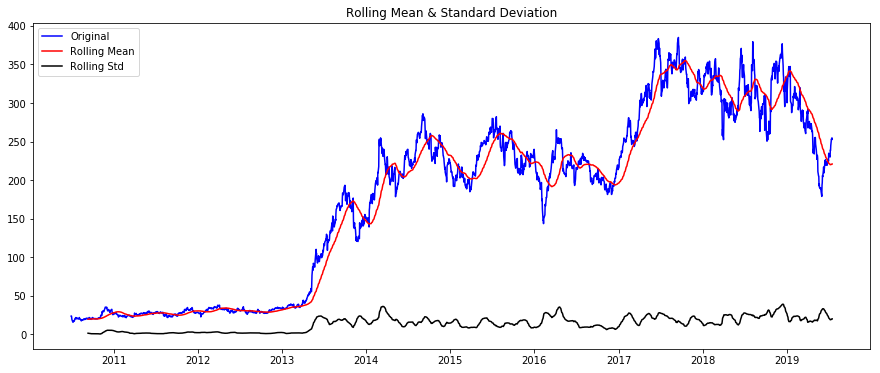

Results of Dickey-Fuller Test:
Test Statistic                   -1.548211
p-value                           0.509542
#Lags Used                        0.000000
Number of Observations Used    2278.000000
Critical Value (1%)              -3.433224
Critical Value (5%)              -2.862810
Critical Value (10%)             -2.567446
dtype: float64


In [202]:
check_stationarity(ts_msft)

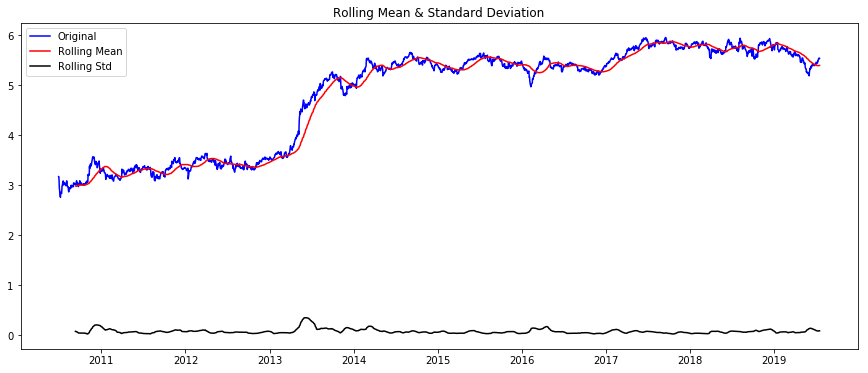

Results of Dickey-Fuller Test:
Test Statistic                   -1.433315
p-value                           0.566205
#Lags Used                        0.000000
Number of Observations Used    2278.000000
Critical Value (1%)              -3.433224
Critical Value (5%)              -2.862810
Critical Value (10%)             -2.567446
dtype: float64


In [248]:
ts_log = np.log(ts_msft)
check_stationarity(ts_log)

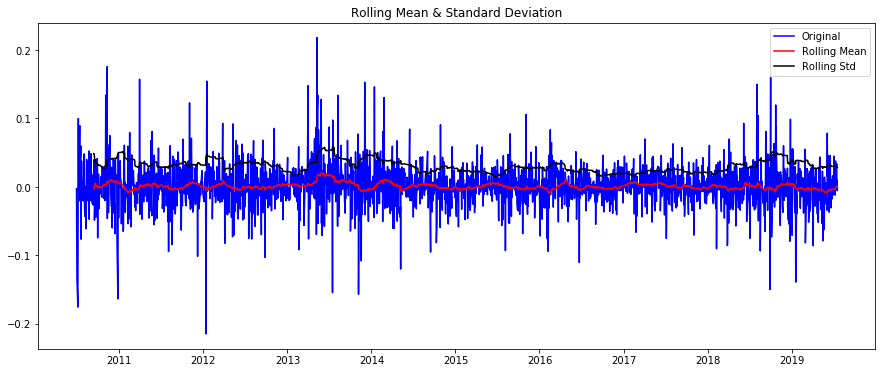

Results of Dickey-Fuller Test:
Test Statistic                  -47.602085
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2277.000000
Critical Value (1%)              -3.433225
Critical Value (5%)              -2.862810
Critical Value (10%)             -2.567446
dtype: float64


In [246]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
check_stationarity(ts_log_diff)

In [0]:
ARIMA_diff_cumsum = ts_log_diff.cumsum()
ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log = ARIMA_log.add(ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(ARIMA_log)

In [226]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(predictions_ARIMA, start_p=6, start_q=1,
                           max_p=6, max_q=1, m=5,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(4, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=14717.133, BIC=14762.964, Fit time=11.244 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 5); AIC=16321.841, BIC=16333.298, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 5); AIC=15609.658, BIC=15632.574, Fit time=1.306 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=14710.622, BIC=14733.537, Fit time=3.583 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 5); AIC=14710.418, BIC=14739.062, Fit time=4.829 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 5); AIC=15609.665, BIC=15632.581, Fit time=1.347 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 5); AIC=14710.470, BIC=14744.843, Fit time=16.864 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 5); AIC=16323.181, BIC=16340.368, Fit time=0.500 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 5); AIC=14714.150, BIC=14754.252, Fit time=10.477 seconds
Fit ARIMA: order

In [227]:
train = ts_log_diff.loc['2000-01-02':'2015-01-02']
test = ts_log_diff.loc['2015-05-28':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 1, 5), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [228]:
future_forecast = stepwise_model.predict(n_periods=1043)
print(future_forecast)

[-0.01018748 -0.01450537 -0.01600719 ... -0.39678002 -0.40033967
 -0.402016  ]


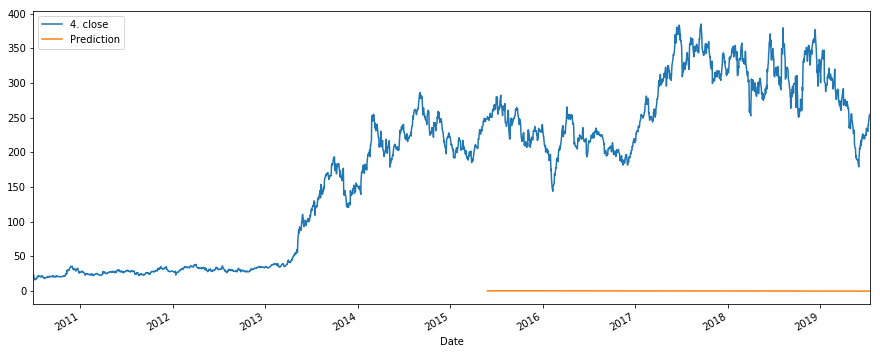

In [229]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([ts_msft,future_forecast],axis=1).plot()

MONTE CARLO SIMULATION

In [230]:
indexed_df[['date','4. close']]

,date,4. close
Date,,
2010-06-29,2010-06-29,23.89
2010-06-30,2010-06-30,23.83
2010-07-01,2010-07-01,21.96
2010-07-02,2010-07-02,19.20
2010-07-06,2010-07-06,16.11
2010-07-07,2010-07-07,15.80
2010-07-08,2010-07-08,17.46
2010-07-09,2010-07-09,17.40
2010-07-12,2010-07-12,17.05


In [0]:
log_returns = np.log(1 + indexed_df['4. close'].pct_change())

In [0]:
u = log_returns.mean()
var = log_returns.var()
stdev = log_returns.std()

In [263]:
drift = u - (0.5 * var)
drift

0.0005159000500907794

In [0]:
#np.array(drift)
#norm.ppf(.95)
#x = np.random.rand(10,2)
#norm.ppf(x)
#Z = norm.ppf(np.random.rand(10,2))

In [0]:
t_intervals = 250
iterations = 8

In [0]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [0]:
S0 =indexed_df['4. close'].iloc[-1]

#close price

In [0]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0

In [0]:
for t in range(1, t_intervals):
    price_list[t] = price_list [t - 1] * daily_returns[t]

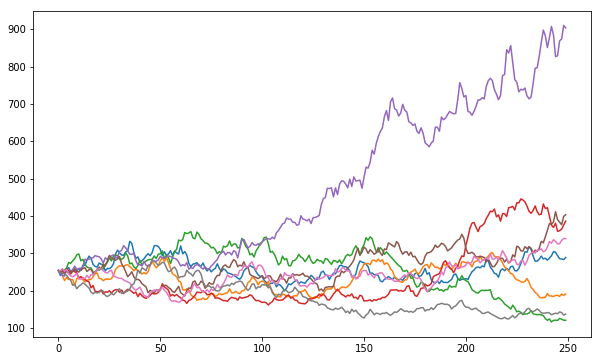

In [279]:
plt.figure(figsize = (10,6))
plt.plot(price_list)


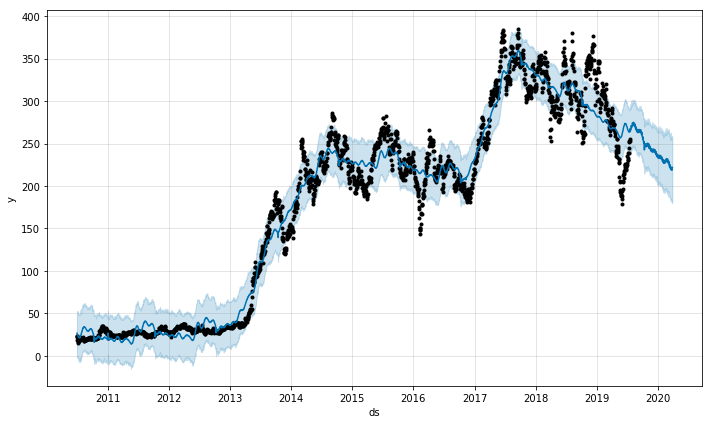

In [284]:
plot = model.plot(forecast)
plt.savefig('fb.png')

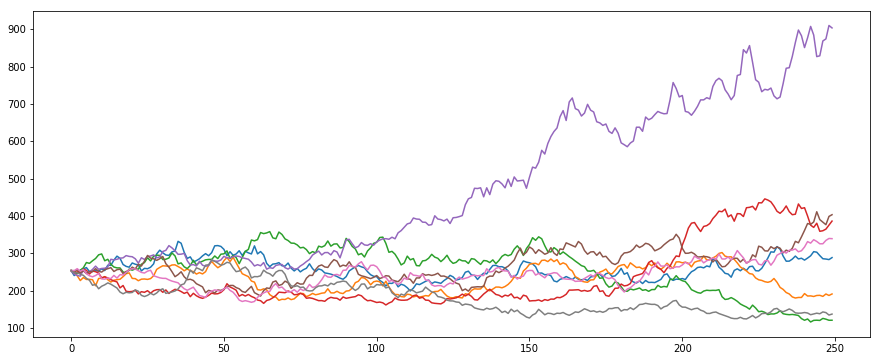

In [285]:
plt.plot(price_list)
plt.savefig('arima.png')

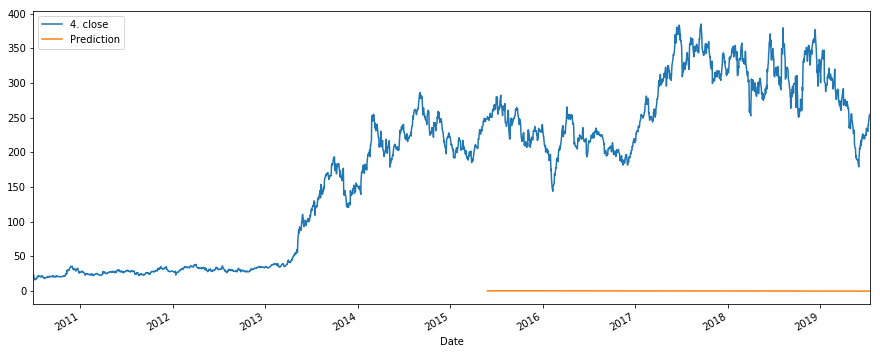

In [283]:
pd.concat([ts_msft,future_forecast],axis=1).plot()
plt.savefig('mc.png')

In [286]:
import socket
print(socket.gethostbyname(socket.getfqdn(socket.gethostname())))

from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

import threading
threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':80}).start() 

172.28.0.2
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug:172.28.0.2 - - [19/Jul/2019 01:04:08] "GET / HTTP/1.1" 200 -


200
utf-8
ascii
Hello World!
